# Capstone 2: *National Transit Database*
## *Exploratory Data Analysis*
***

## 2.1 Table of Contents<a id='1.1_Contents'></a>
* [2 Exploratory Data Analysis](#2_Exploratory_Data_Analysis)
  * [2.1 Table of Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Importing the Dependencies](#2.3_Importing_the_Dependencies)
  * [2.4 Importing the Data](#2.4_Importing_the_Data)
  * [2.5 Data Storytelling](#2.5_Data_Storytelling)
      * [2.5.1 Question 1](#2.5.1_Question_1)
      * [2.5.2 Question 2](#2.5.2_Question_2)
      * [2.5.3 Question 3](#2.5.3_Question_3)
      * [2.5.4 Question 4](#2.5.4_Question_4)
      * [2.5.5 Question 5](#2.5.5_Question_5)

## 2.2 Introduction
<a id='2.2_Introduction'></a>

Text for intro

## 2.3 Importing the Dependencies
<a id='2.3_Importing_the_Dependencies'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import groupby

pd.set_option('display.max_rows', 70)

## 1.5 Importing the Data
<a id='1.5_Importing_the_Data'></a>

In [2]:
data = pd.read_csv("data_cleaned.csv", dtype={'4 Digit NTD ID': str})

In [3]:
data.shape

(133148, 65)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133148 entries, 0 to 133147
Data columns (total 65 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   5 DIgit NTD ID                              133148 non-null  int64  
 1   4 Digit NTD ID                              130151 non-null  object 
 2   Agency                                      133148 non-null  object 
 3   Organization Type                           133121 non-null  object 
 4   Mode                                        133148 non-null  object 
 5   Type of Service                             133148 non-null  object 
 6   Rail (Y/N)                                  133148 non-null  bool   
 7   Primary UZA Code                            133148 non-null  int64  
 8   Primary UZA Name                            133121 non-null  object 
 9   Primary UZA Sq Miles                        133121 non-null  float64
 

## 2.5 Data Storytelling
<a id='2.5_Data_Storytelling'></a>

### 2.5.1 Question 1
<a id='2.5.1_Question_1'></a>
**What can I do about the 27 rows from The East Central Iowa Council of Governments ('5 DIgit NTD ID' 70138) which still contain nans?**

In [5]:
#Identifying which columns have nans

temp = data[data['5 DIgit NTD ID']==70138].isna().sum()
temp[data[data['5 DIgit NTD ID']==70138].isna().sum() > 0]


Organization Type          27
Primary UZA Name           27
Primary UZA Sq Miles       27
Primary UZA Population     27
Service Area Sq Miles      27
Service Area Population    27
dtype: int64

In [6]:
# Missing values found through NTD Website
values = {"Organization Type": "MPO, COG or Other Planning Agency ", "Primary UZA Name": "Iowa City, IA ", "Primary UZA Sq Miles": 46, "Primary UZA Population": 106621, "Service Area Sq Miles": 26, "Service Area Population": 74950}

data= data.fillna(value=values)

#Checking for any remaining NaNs
temp2 = data[data['5 DIgit NTD ID']==70138].isna().sum()
temp2[data[data['5 DIgit NTD ID']==70138].isna().sum() > 0]

Series([], dtype: int64)

Although the missing information was not found in our dataframe during Data Wrangling, I was able to locate the correct information for The East Central Iowa Council of Governments through the [NTD Website](https://datahub.transportation.gov/Public-Transit/Monthly-Modal-Time-Series/5ti2-5uiv/data).  So, I was able to manually fill the columns with the appropriate data.

### 2.5.2 Question 2
<a id='2.5.2_Question_2'></a>
**Part 1: Is there exactly one value for 'Primary UZA Population' for each 'Primary UZA Code'?**

In [7]:
u = data.groupby('Primary UZA Code')['Primary UZA Population'].nunique()
u[data.groupby('Primary UZA Code')['Primary UZA Population'].nunique() != 1]


Primary UZA Code
0    154
Name: Primary UZA Population, dtype: int64

There is exactly one 'Primary UZA Population' for each 'Primary UZA Code' except where the "Primary UZA Code' is zero.  A look at the [NTD Website](https://datahub.transportation.gov/Public-Transit/Monthly-Modal-Time-Series/5ti2-5uiv/data) confirms zero is a placeholder and not an assigned code, so I will replace the zeros with data from elsewhere in the dataframe where it is available.

In [8]:
#replacing zeros with nans
data['Primary UZA Code'].replace(0, np.nan, inplace=True)


#Filling the nans with appropriate data
first = data.groupby('Primary UZA Population')['Primary UZA Code'].first()
data['Primary UZA Code'] = data['Primary UZA Code'].fillna(data['Primary UZA Population'].map(first))
if data['Primary UZA Code'].isnull().sum() == 0:
    print("All 'Primary UZA Code' fields which formerly equaled zero have now been filled with appropriate data.")

All 'Primary UZA Code' fields which formerly equaled zero have now been filled with appropriate data.


In [9]:
# nunique values for pop when grouped by code
# expect one value each except for code = 0

u = data.groupby('Primary UZA Code')['Primary UZA Population'].nunique()
u[data.groupby('Primary UZA Code')['Primary UZA Population'].nunique() != 1]


Series([], Name: Primary UZA Population, dtype: int64)

Now there is exactly one value of 'Primary UZA Population' for each 'Primary UZA Code.'

**Part 2: Are the 'Primary UZA Code's ordered by population size?**

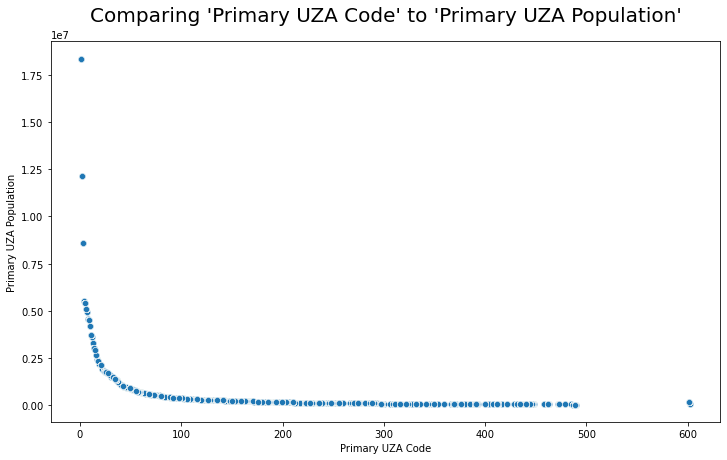

In [10]:
#plot UZA Code and Population to see if they both increase together as expected

plt.figure(figsize=(12,7))
ax = sns.scatterplot(x=data['Primary UZA Code'], y=data['Primary UZA Population'] )
ax.set_title("Comparing 'Primary UZA Code' to 'Primary UZA Population'", fontsize=20, pad=20)
plt.show()

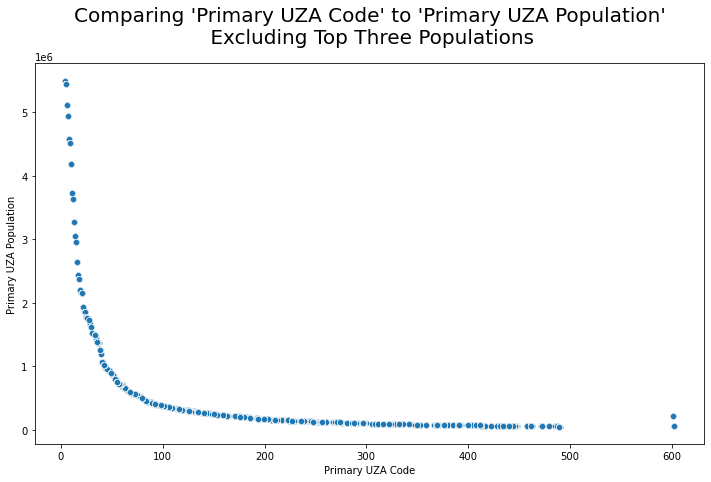

In [11]:
subset = data.loc[data['Primary UZA Code']> 3]

plt.figure(figsize=(12,7))

ax = sns.scatterplot(x=subset['Primary UZA Code'], y=subset['Primary UZA Population'] )
ax.set_title("Comparing 'Primary UZA Code' to 'Primary UZA Population'\n Excluding Top Three Populations", fontsize=20, pad=20)
plt.show()

In [12]:
temp = data.loc[data['Primary UZA Code']>590, ['5 DIgit NTD ID','Primary UZA Code', 'Primary UZA Population']]
temp.drop_duplicates()


,5 DIgit NTD ID,Primary UZA Code,Primary UZA Population
36807,91092,601.0,210000.0
114126,60015,602.0,54770.0


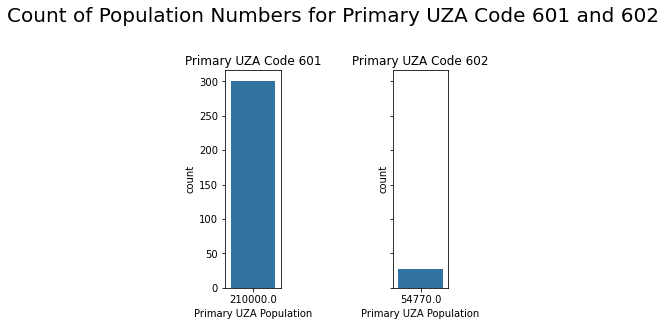

In [13]:

six_o_one = data.loc[data['Primary UZA Code']==601, ['5 DIgit NTD ID', 'Primary UZA Code', 'Primary UZA Population']]
six_o_two = data.loc[data['Primary UZA Code']==602, ['5 DIgit NTD ID', 'Primary UZA Code', 'Primary UZA Population']]

fig, ax =plt.subplots(1,2, figsize=(4,4), sharey=True)
fig.suptitle('Count of Population Numbers for Primary UZA Code 601 and 602', fontsize=20, y=1.1)
# Adjust the subplot layout parameters
fig.subplots_adjust(wspace=2)

sns.countplot(x='Primary UZA Population', data=six_o_one, ax=ax[0])
ax[0].set_title('Primary UZA Code 601')
sns.countplot(x='Primary UZA Population', data=six_o_two, ax=ax[1])
ax[1].set_title('Primary UZA Code 602')
print("")

It appears that the 'Primary UZA Code' and the 'Primary UZA Population' have and inverse relationship except where 'Primary UZA Code' equals 602.  There is also a large gap in the 'Primary UZA Code's.  We can see from the countplot above that 'Primary UZA Code's 601 and 602, which are the only two numbers after the large gap, contain only one value each for 'Primary UZA Population', so their population values do not seem to be an error.  Because of the anomoly of 'Primary UZA Code' 602 being out of place in the lineup of population values, it will be better to use the 'Primary UZA Population' column for data analysis.  The 'Primary UZA Code' column can be removed.

### 2.5.3 Question 3
<a id='2.5.3_Question_3'></a>
**Part 1: How many distinct values are there in each categorical column?**

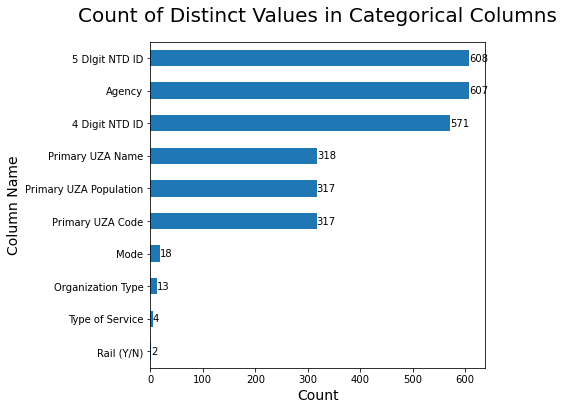

In [14]:
count = data[['5 DIgit NTD ID', '4 Digit NTD ID', 'Agency','Organization Type','Mode', 'Type of Service', 'Rail (Y/N)', 'Primary UZA Code', 'Primary UZA Name', 'Primary UZA Population']].nunique()

plt.figure(figsize=(6,6))
ax = count.sort_values(ascending=True).plot(kind='barh', fontsize=10)
ax.set_title('Count of Distinct Values in Categorical Columns', fontsize=20, pad=20)
ax.set_xlabel('Count', fontsize=14)
ax.set_ylabel('Column Name', fontsize=14)
ax.bar_label(ax.containers[0])
print("")

With hundreds of distinct values in the first six columns it would not be feasible to assign each one a numerical value, thereby increasing the number of features by the number of values in each of those fields. Since it could possibly be an option for the lower four, it will be worth it to take a closer look at the distribution of that data. 

**Part 2: What is the distribution of values for 'Mode', 'Organization Type', 'Type of Servie', and 'Rail (Y/N)'?**

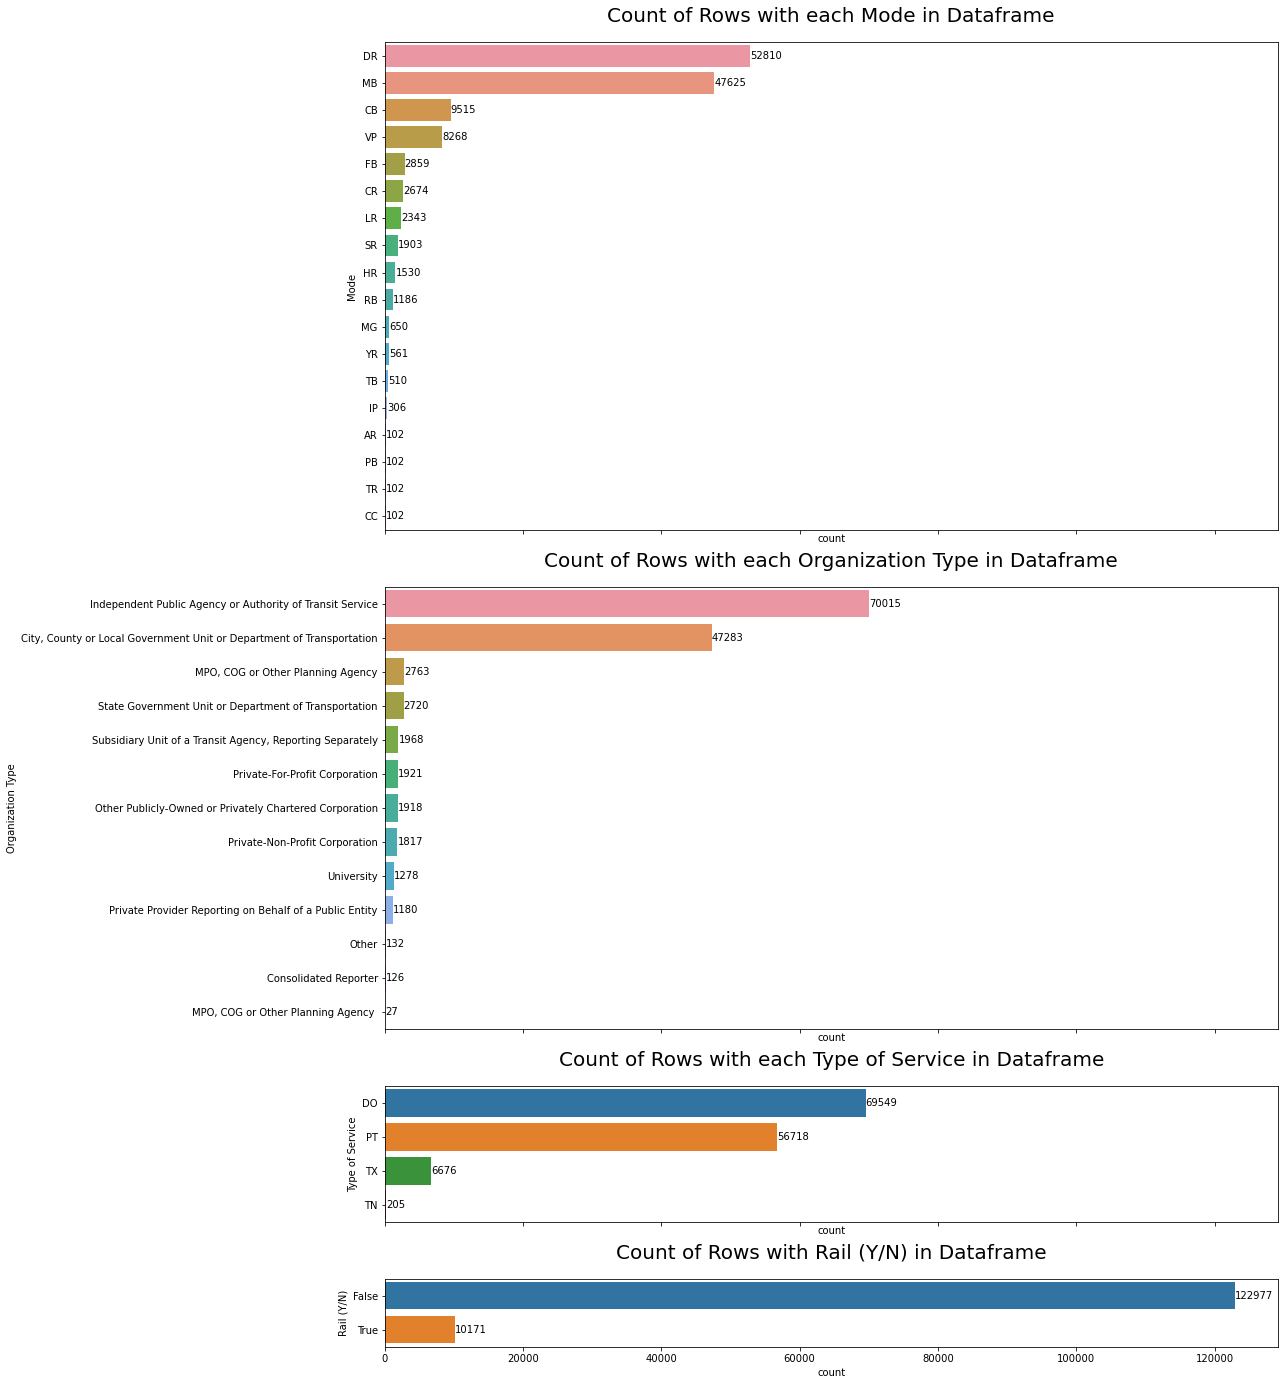

In [15]:
fig, ax =plt.subplots(4,1, figsize=(16,24), gridspec_kw={'height_ratios': [.43, .39, .12, .06]}, sharex=True)

sns.countplot(y=data['Mode'], ax=ax[0], order=data['Mode'].value_counts().index)
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Count of Rows with each Mode in Dataframe', fontsize=20, pad=20)


sns.countplot(y=data['Organization Type'], ax=ax[1], order=data['Organization Type'].value_counts().index)
ax[1].bar_label(ax[1].containers[0])
ax[1].set_title('Count of Rows with each Organization Type in Dataframe', fontsize=20, pad=20)

sns.countplot(y=data['Type of Service'], ax=ax[2], order=data['Type of Service'].value_counts().index)
ax[2].bar_label(ax[2].containers[0])
ax[2].set_title('Count of Rows with each Type of Service in Dataframe', fontsize=20, pad=20)

sns.countplot(y=data['Rail (Y/N)'], ax=ax[3], order=data['Rail (Y/N)'].value_counts().index)
ax[3].bar_label(ax[3].containers[0])
ax[3].set_title('Count of Rows with Rail (Y/N) in Dataframe', fontsize=20, pad=20)
print("")


Having a picture of the count for each value in these four columns may prove useful later.  Simply knowing that there are very few occurrances of some modes and organization types is useful.  

One note about the 'Type of Service' 'TN': The documention from NTD shows the new TOS designation "TN" came into use Sept 2019 but it first occurs in the database in July 2018.  Since this type of service was not in use for the entire life of the database, I will need to be cautions about how I use the data.  The lower number of occurrnaces does not reflect the proportion of rows after July 2018 which are in this category.

In [16]:
temp = data[data['Type of Service']=='TN']
temp[['5 DIgit NTD ID', 'Agency','Mode', 'Month','Year','Type of Service']].sort_values(by=['Year', 'Month'], ascending=True).head(1)


,5 DIgit NTD ID,Agency,Mode,Month,Year,Type of Service
74102,90162,The Eastern Contra Costa Transit Authority,DR,7,2018,TN


### 2.5.4 Question 4
<a id='2.5.4_Question_4'></a>
**What can I learn about the rows where 'Ridership' equals zero?**
* **How often does this occur?**
* **Are the various safety events also zero when this occurs?**
* **How long does Ridership stay at zero when this occurs?**
* **When it rebounds from zero, does it slowly climb or go back to full capacity?**
* **Is it zero across all modes of transportation for each reporting Agency at the same time or it is just one?**
* **Can we see a trend when looking at the number of times this occurs by year?**
* **Does it look like the zero truly represents the amount of ridership or is it a placeholder?**

**Knowing these answers will help me understand how these rows should be interpreted and how (or if) they should be used for data analysis.**

In [17]:
#How often does this occur?

#Looking for '5 DIgit NTD ID's where at least one row has Ridership equal to zero.

zero_ridership = data[data['Ridership']==0]

zero_ridership_IDs = zero_ridership[['5 DIgit NTD ID', 'Ridership']].drop_duplicates()
zero_ridership_IDs = zero_ridership_IDs[zero_ridership_IDs.columns[0]].count()

zero_ridership_rows = zero_ridership[['5 DIgit NTD ID', 'Ridership']]
zero_ridership_rows = zero_ridership_rows[zero_ridership_rows.columns[0]].count()

print("Number of '5 DIgit NTD ID's with at least one report of zero 'Ridership':", zero_ridership_IDs)
print("Number of rows where 'Ridership' is zero:", zero_ridership_rows)


Number of '5 DIgit NTD ID's with at least one report of zero 'Ridership': 148
Number of rows where 'Ridership' is zero: 1562


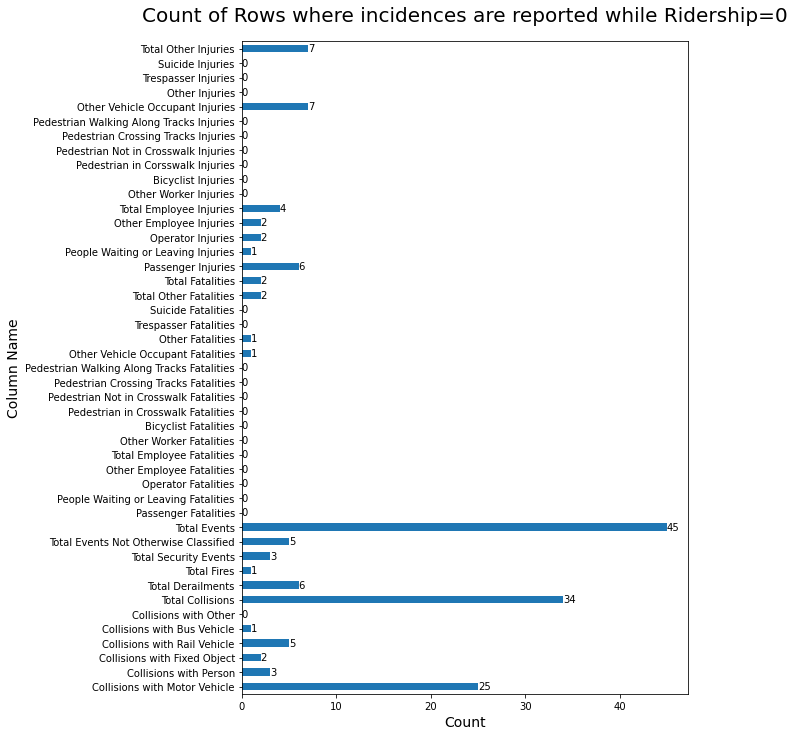

In [18]:
#Are the various safety events also zero when this occurs?

incidences = zero_ridership.iloc[:, 19:64]

incidences = incidences.mask(incidences > 0, 1)
incidences.index = zero_ridership['5 DIgit NTD ID']

columns = list(incidences)

x = []
for i in columns:
    count_i = incidences[i].value_counts()
    x.append(count_i)
x
x = pd.DataFrame(x)



ax = x[1].plot(kind='barh', figsize=(8,12))
ax.bar_label(ax.containers[0])
ax.set_title('Count of Rows where incidences are reported while Ridership=0', fontsize=20, pad=20)
ax.set_xlabel('Count', fontsize=14)
ax.set_ylabel('Column Name', fontsize=14)
print("")

#I need to change the order of the columns to something more meaningful

<div class="alert alert-danger" role="alert">
AJ: I want this to end up being box plots that show stats for the lenght of time Ridership remained zero each time that occurred.  I'm a little stuck.  I need to get rid of all the tuples where the first number is zero because I don't need that data.  I want to keep the tuples where the first number is one (representing 'yes' something was reported) and plot the stats for each column name. Alternatively, I could only do box plots for the 'total...' columns.

In [19]:
#How long does Ridership stay at zero when this occurs?



columns = list(incidences)

a = []
for b in columns:
    count_b = [(k, sum(1 for i in g)) for k,g in groupby(incidences[b])]
    a.append([b, count_b])
a
a = pd.DataFrame(a)
a



#finding consecutive occurances
##This gets me a tuple of the number 0 or 1 and then the number of times it occurred consecutively
#grouped_d = [(k, sum(1 for i in g)) for k,g in groupby(incidences['Collisions with Motor Vehicle'])]
#grouped_d = pd.DataFrame(grouped_d)
#grouped_d
#ax = grouped_d[0].plot(kind='bar', fontsize=10)


#ax = x[1].plot(kind='barh', figsize=(8,12))
#ax.bar_label(ax.containers[0])
#ax.set_title('Count of Rows where incidences are reported while Ridership=0', fontsize=20, pad=20)
#ax.set_xlabel('Count', fontsize=14)
#ax.set_ylabel('Column Name', fontsize=14)
#print("")




#sort zero_ridership by ID, Year, Month
#for i in ID:
#    for t in year,month:
#        count number of months in a row ridership=0
#        append that number to a list
#        (keep looking through that same id number until the end is reached)
#        (then look through next id number)

#make a boxplot of the number of months in a row ridership was zero

,0,1
0,Collisions with Motor Vehicle,"[(1, 1), (0, 191), (1, 1), (0, 181), (1, 1), (..."
1,Collisions with Person,"[(0, 811), (1, 1), (0, 317), (1, 1), (0, 252),..."
2,Collisions with Fixed Object,"[(0, 888), (1, 1), (0, 577), (1, 1), (0, 95)]"
3,Collisions with Rail Vehicle,"[(0, 357), (1, 1), (0, 179), (1, 1), (0, 251),..."
4,Collisions with Bus Vehicle,"[(0, 1013), (1, 1), (0, 548)]"
5,Collisions with Other,"[(0, 1562)]"
6,Total Collisions,"[(1, 1), (0, 191), (1, 1), (0, 164), (1, 1), (..."
7,Total Derailments,"[(0, 357), (1, 1), (0, 56), (1, 1), (0, 374), ..."
8,Total Fires,"[(0, 1097), (1, 1), (0, 464)]"
9,Total Security Events,"[(0, 792), (1, 1), (0, 94), (1, 1), (0, 371), ..."


In [20]:
#When it rebounds from zero, does it slowly climb or go back to full capacity?

In [21]:
#Is Ridership zero across all modes of transportation for each reporting Agency at the same time or it is just one?

Text(0.5, 1.0, 'Count by Year of Rows where Ridership = 0')

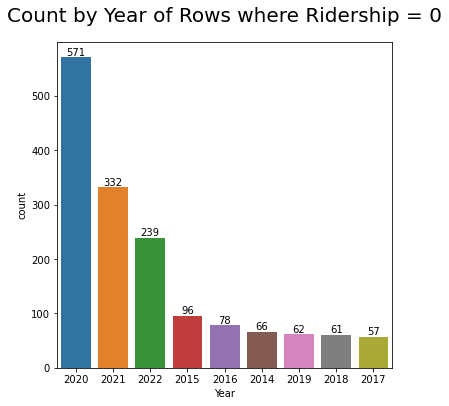

In [22]:
#Can we see a trend when looking at the number of times this occurs by year?

plt.figure(figsize=(6,6))

ax = sns.countplot(x=zero_ridership['Year'], order=zero_ridership['Year'].value_counts().index)
ax.bar_label(ax.containers[0])
ax.set_title('Count by Year of Rows where Ridership = 0', fontsize=20, pad=20)

So, was Ridership never equal to zero in the other years?

In [23]:
#Is it possible to confidently decide whether the zero truly represents the amount of ridership or if it is a placeholder?

Reflection

### 2.5.5 Question 5
<a id='2.5.5_Question_5'></a>

Q5

Code

Reflection

Concluding thoughts and Looking forward - can remove the 'Primary UZA Code' column.

Note to Self: FTA regions [FTA Regions](https://www.transit.dot.gov/about/regional-offices/regional-offices) This addition resource may or may not be useful later.

## Feature Engineering Ideas

In [24]:
# Make a date-time column from the 'Year' and 'Month' columns.

In [25]:
# Make two groups for 'rail' and non-rail' modes of transportation

In [26]:
# Could create a separate dataframe which only keeps the 'total...' columns
# for looking at the bigger picture

## Block 2

In [27]:
#sns.pairplot(data, corner=True)

In [28]:
#heatmap_data = data.drop(columns=['4 Digit NTD ID'])
#sns.heatmap(heatmap_data, annot=True)